In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot') # Look Pretty

In [41]:
def plotDecisionBoundary(model, X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    padding = 0.6
    resolution = 0.0025
    colors = ['royalblue', 'forestgreen', 'ghostwhite']
    
    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding
    
    # Create 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                        np.arange(y_min, y_max, resolution))
    
    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour map
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)
    
    # Plot the test original point as well...
    for label in range(len(np.unique(y))):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)
        
    p = model.get_params()
    plt.axis(('tight'))
    plt.title('K= ' + str(p['n_neighbors']))

In [42]:
#
# TODO: Load up the dataset into a variable called X. Check the .head and
# compare it to the file you loaded in a text editor. Make sure you're
# loading your data properly--don't fail on the 1st step!
#
df = pd.read_csv('Datasets/wheat.data')
df.head()

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [43]:
#
# TODO: Copy the 'wheat_type' series slice of X, and into a series called 'y.
# Then drop the original 'wheate_type' column from the X
#
y = df.wheat_type
X = df.drop(['wheat_type'], axis=1)
X.head()

,id,area,perimeter,compactness,length,width,asymmetry,groove
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [44]:
# TODO: Do a quick, "ordinal" conversion of 'y'. In actuality our
# classification isn't ordinal, but just as an experiment...
#
y = y.astype('category').cat.codes

In [45]:
#
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
X = X.fillna(X.mean())

In [59]:
#
# TODO: Split X into training and testing data sets using train_test_split().
# INFO: Use 0.33 test size, and use random_state=1 (? random_state = 14 => get
# the same results with the answer). This is important so that your answers
# are verifiable. In the real world, you wouldn't specify a random_state.
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=14)

In [54]:
# 
# TODO: Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against your *training* data.
#
# NOTE: The reason you only fit against your training data is because in a
# real-world situation, you'll only have your training data to train with!
# In this lab setting, you have both train+test data; but in the wild,
# you'll only have your training data, and then unlabeled data you want to
# apply your models to.
#
from sklearn.preprocessing import Normalizer
nm = Normalizer().fit(X_train)

#
# TODO: With your trained pre-processor, transform both your training AND
# testing data.
#
# NOTE: Any testing data has to be transformed with your preprocessor
# that has ben fit against your training data, so that it exist in the same
# feature-space as the original data used to train your models.
#
X_train_nm = nm.transform(X_train)
X_test_nm = nm.transform(X_test)

In [55]:
#
# TODO: Just like your preprocessing transformation, create a PCA
# transformation as well. Fit it against your training data, and then
# project your training and testing features into PCA space using the
# PCA model's .transform() method.
#
# NOTE: This has to be done because the only way to visualize the decision
# boundary in 2D would be if your KNN algo ran in 2D as well:
#
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full').fit(X_train_nm)

# transform training and testing data
X_train_nm_pca = pca.transform(X_train_nm)
X_test_nm_pca = pca.transform(X_test_nm)

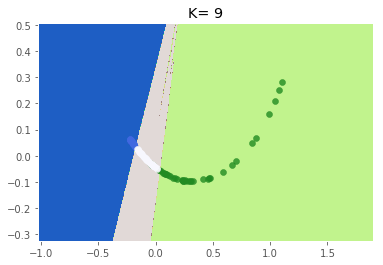

In [56]:
#
# TODO: Create and train a KNeighborsClassifier. Start with K=9 neighbors.
# NOTE: Be sure train your classifier against the pre-processed, PCA-
# transformed training data above! You do not, of course, need to transform
# your labels.
#
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_nm_pca, y_train)

# HINT: Ensure your KNeighbors classifier object from earlier is called 'knn'
plotDecisionBoundary(knn, X_train_nm_pca, y_train)

In [57]:
#------------------------------------
#
# TODO: Display the accuracy score of your test data/labels, computed by
# your KNeighbors model.
#
# NOTE: You do NOT have to run .predict before calling .score, since
# .score will take care of running your predictions for you automatically.
#
knn.score(X_test_nm_pca, y_test)

0.8714285714285714

In [58]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_nm_pca, y_train)
    print('K = ', i)
    print(knn.score(X_test_nm_pca, y_test))

K =  1
0.9
K =  2
0.9142857142857143
K =  3
0.8857142857142857
K =  4
0.8857142857142857
K =  5
0.8857142857142857
K =  6
0.8857142857142857
K =  7
0.8857142857142857
K =  8
0.8857142857142857
K =  9
0.8714285714285714


In [ ]:
#
# BONUS: Instead of the ordinal conversion, try and get this assignment
# working with a proper Pandas get_dummies for feature encoding. HINT:
# You might have to update some of the plotDecisionBoundary code.


plt.show()